In [3]:
#  import the necessary liabraries

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import warnings 
warnings.filterwarnings('ignore')

In [4]:
# reading the data
data = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv")
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
 df = pd.DataFrame(data, columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality'])

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
Rating = []

In [8]:
 Rating = []
for row in df['quality']:
        if row <= 7.0 :    Rating.append('bad')
        elif row >= 7.0:   Rating.append('good')

In [9]:
df['Rating'] = Rating
df 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,bad


In [10]:
label_encoder = preprocessing.LabelEncoder()

In [11]:
df['Rating']= label_encoder.fit_transform(df['Rating'])

In [12]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [11]:
#df.drop("quality", axis=1, inplace= True)

In [ ]:
#df

In [13]:
# remove special character
df.columns = df.columns.str.replace(' ', '')
  
# print file after removing special character
df

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [14]:
df.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [15]:
df.shape

(1599, 13)

In [16]:
df.describe()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.011257
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.105533
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


# EDA

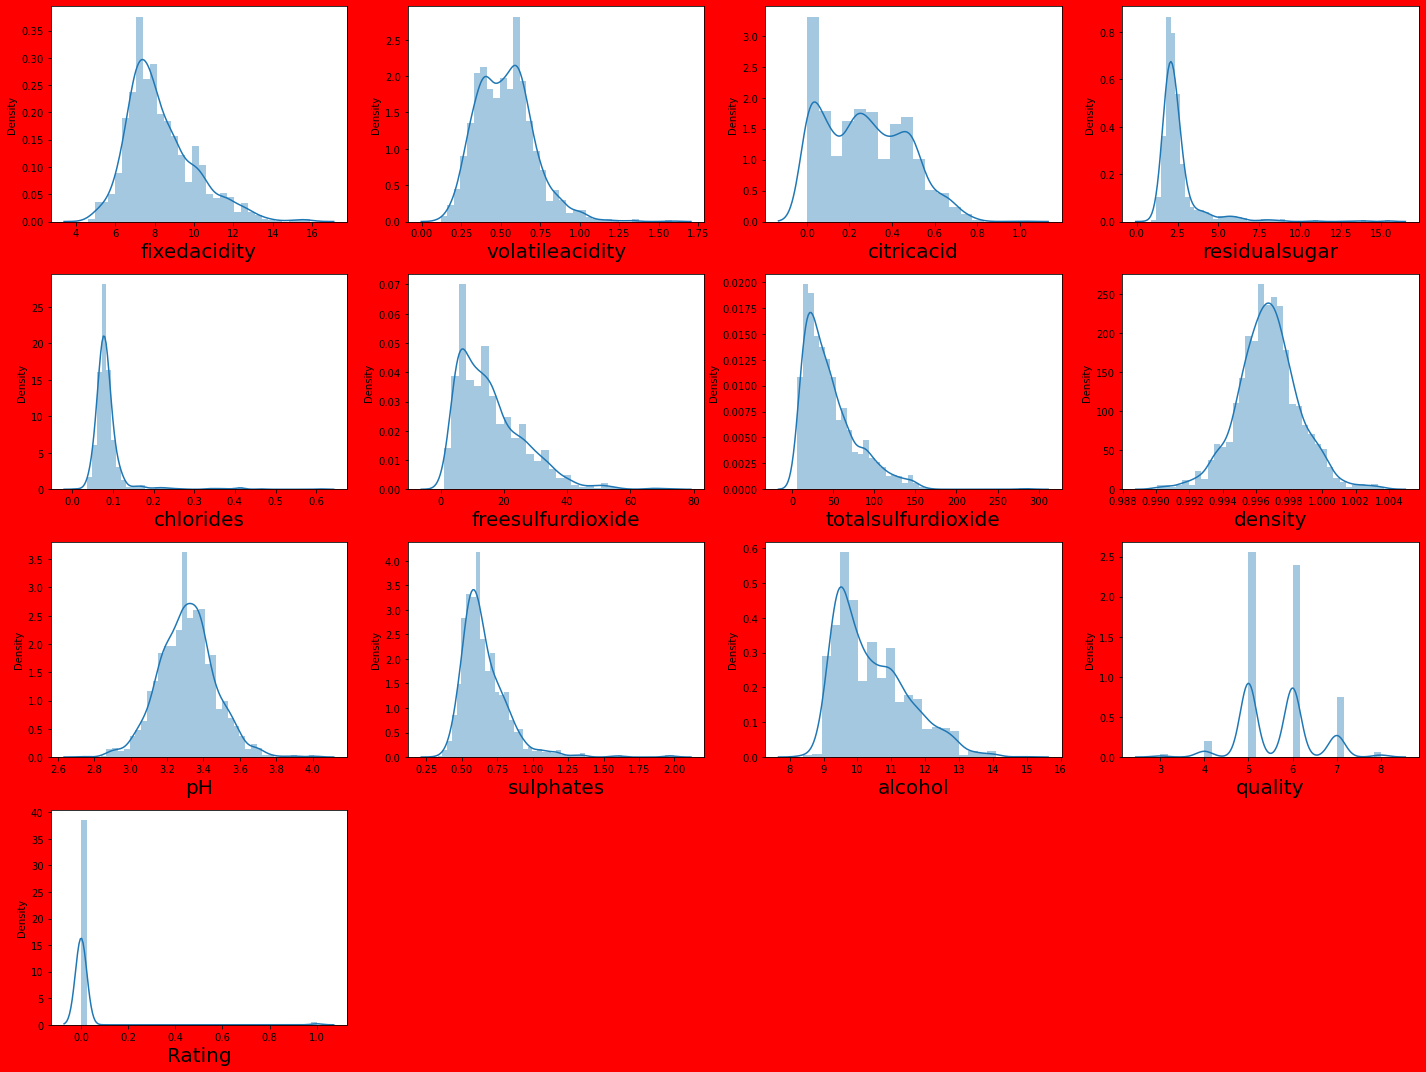

In [17]:
plt.figure(figsize=(20,15), facecolor='red')
plotnumber = 1

for column in df:
    if plotnumber<=13:   # there are 12 column is the given data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [18]:
#   replacing Zero values with the mean of the column
df['citricacid'] = df['citricacid'].replace(0,df['citricacid'].mean())

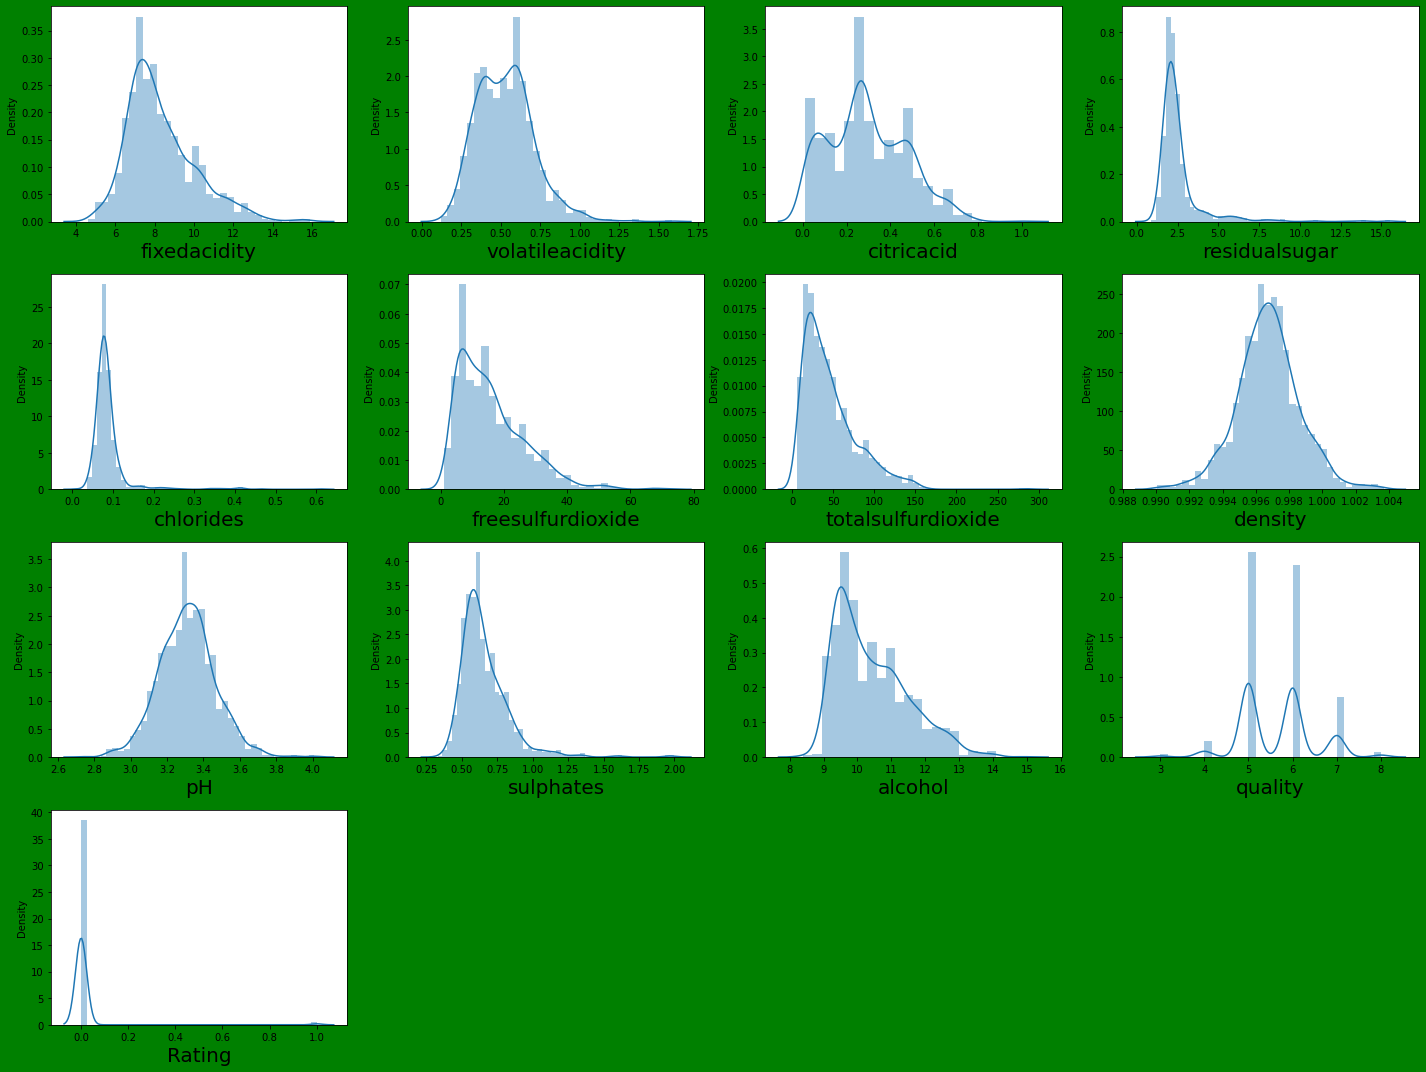

In [19]:
plt.figure(figsize=(20,15), facecolor='green')
plotnumber = 1

for column in df:
    if plotnumber<=13:   # there are 12 column is the given data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [20]:
df_features = df.drop(['Rating','quality'],axis=1)

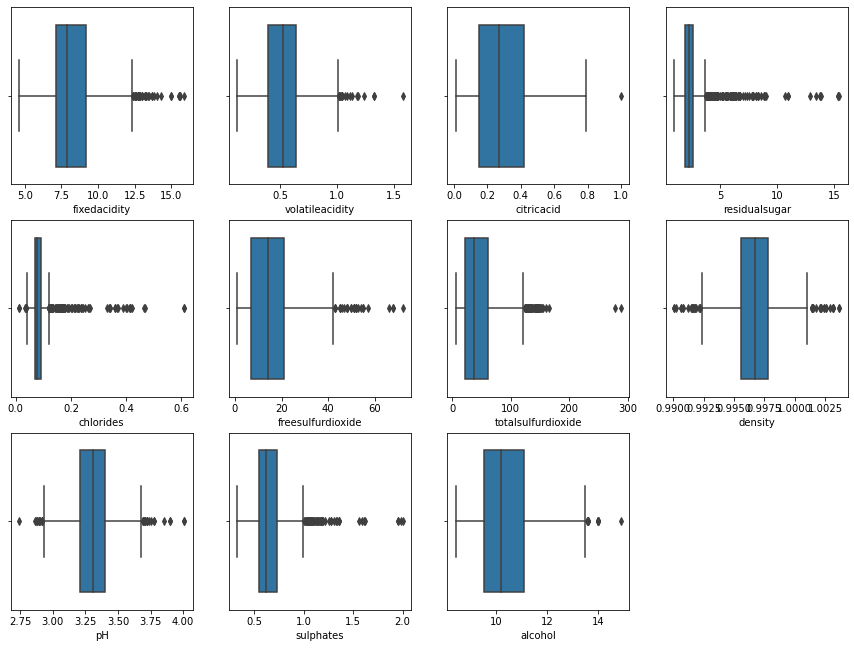

In [21]:
#show the outliers using box plot
plt.figure(figsize=(15,15))
graph = 1

for column in df_features:
    if graph<=11:   # there are 11 column is the given data
        plt.subplot(4,4,graph)
        ax=sns.boxplot(df_features[column])
        plt.xlabel(column,fontsize=10)
        
    graph+=1
plt.show()

In [22]:
df.shape

(1599, 13)

In [23]:
#   firstly find the IQR(inter quantile range) to identify out liers

# 1st quantile
q1 = df.quantile(0.25)

#  3rd quantile
q3 = df.quantile(0.75)

# IQR
iqr = q3 - q1

#   outliers formula 
1..higher side ==q3+(1.5 * IQR)
2..lower side == q1-(1.5 * IQR)

In [24]:
 # validating outlier
fixacidity_high = (q3.fixedacidity + (1.5 * iqr.fixedacidity)) 
fixacidity_high

12.349999999999998

In [25]:
# check the index which havehigher values
index = np.where(df['fixedacidity'] > fixacidity_high)
index

(array([ 205,  206,  243,  244,  264,  294,  328,  338,  339,  347,  353,
         359,  363,  364,  366,  374,  381,  391,  394,  409,  429,  440,
         442,  446,  470,  472,  509,  510,  516,  538,  544,  548,  554,
         555,  557,  559,  560,  564,  565,  596,  599,  601,  603,  611,
         652,  680,  811,  814, 1224], dtype=int64),)

In [26]:
# drop the index which we found in the above cell
df = df.drop(df.index[index])
df.shape

(1550, 13)

In [27]:
df.reset_index()

,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1545,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1546,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1547,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1548,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [28]:
volacidity_high = (q3.volatileacidity + (1.5 * iqr.volatileacidity))
print (volacidity_high)

index = np.where(df['volatileacidity'] > volacidity_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

1.0150000000000001
(1531, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1526,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1527,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1528,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1529,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [29]:
index

(array([  38,   94,  120,  126,  127,  134,  199,  521,  627,  644,  654,
         659,  664,  678,  851, 1212, 1250, 1263, 1418], dtype=int64),)

In [30]:
ca_high = (q3.citricacid + (1.5 * iqr.citricacid))
print (ca_high)

index = np.where(df['citricacid'] > ca_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

0.825
(1530, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1526,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1527,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1528,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [31]:
rs_high = (q3.residualsugar + (1.5 * iqr.residualsugar))
print (rs_high)

index = np.where(df['residualsugar'] > rs_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

3.6500000000000004
(1392, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1387,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1388,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1389,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1390,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [32]:
cr_low = (q1.chlorides - (1.5 * iqr.chlorides))
print (cr_low)

index = np.where(df['chlorides'] < cr_low)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

0.04000000000000002
(1383, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1378,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1379,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1380,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1381,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [33]:
fsd_high = (q3.freesulfurdioxide + (1.5 * iqr.freesulfurdioxide))
print (fsd_high)

index = np.where(df['freesulfurdioxide'] > fsd_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

42.0
(1367, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1363,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1364,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1365,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [34]:
tsd_high = (q3.totalsulfurdioxide + (1.5 * iqr.totalsulfurdioxide))
print (tsd_high)

index = np.where(df['totalsulfurdioxide'] > tsd_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

122.0
(1330, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1325,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1326,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1327,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1328,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [36]:
dens_low = (q1.density - (1.5 * iqr.density))
print (dens_low)

index = np.where(df['density'] < dens_low)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

0.9922475000000001
(1315, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1310,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1311,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1312,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1313,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [37]:
PH_low = (q1.pH - (1.5 * iqr.pH))
print (PH_low)

index = np.where(df['pH'] < PH_low)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

2.925
(1309, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1305,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1306,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1307,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [38]:
sulp_high = (q3.sulphates + (1.5 * iqr.sulphates))
print (sulp_high)

index = np.where(df['sulphates'] > sulp_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

0.9999999999999999
(1265, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1261,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1262,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1263,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [39]:
alco_high = (q3.alcohol + (1.5 * iqr.alcohol))
print (alco_high)

index = np.where(df['alcohol'] > alco_high)

df = df.drop(df.index[index])
print (df.shape)

df.reset_index()

13.5
(1263, 13)


,index,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality,Rating
0,0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1259,1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1260,1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1261,1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


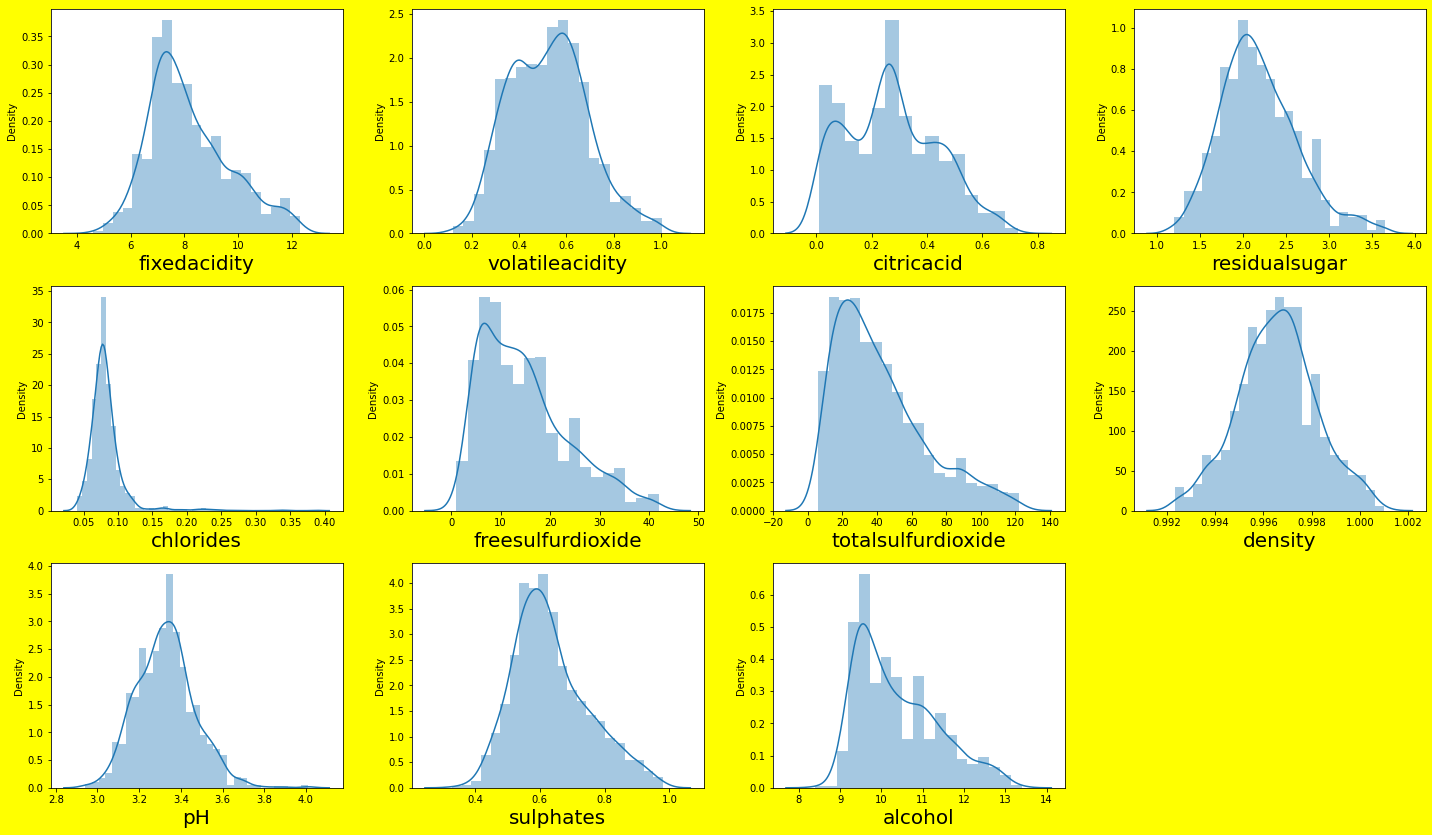

In [54]:
plt.figure(figsize=(20,15), facecolor='yellow')
plotnumber = 1

for column in df:
    if plotnumber<=11:   # there are 12 column is the given data
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

In [55]:
df = df.drop(columns = ['quality'])

In [56]:
df

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,Rating
0,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.270976,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.040000,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.560000,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.270976,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.080000,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.100000,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.130000,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.120000,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


#  finding relationship those features which have relationship with alabel

In [57]:
X= df.drop(columns = ['Rating'])
y = df['Rating']

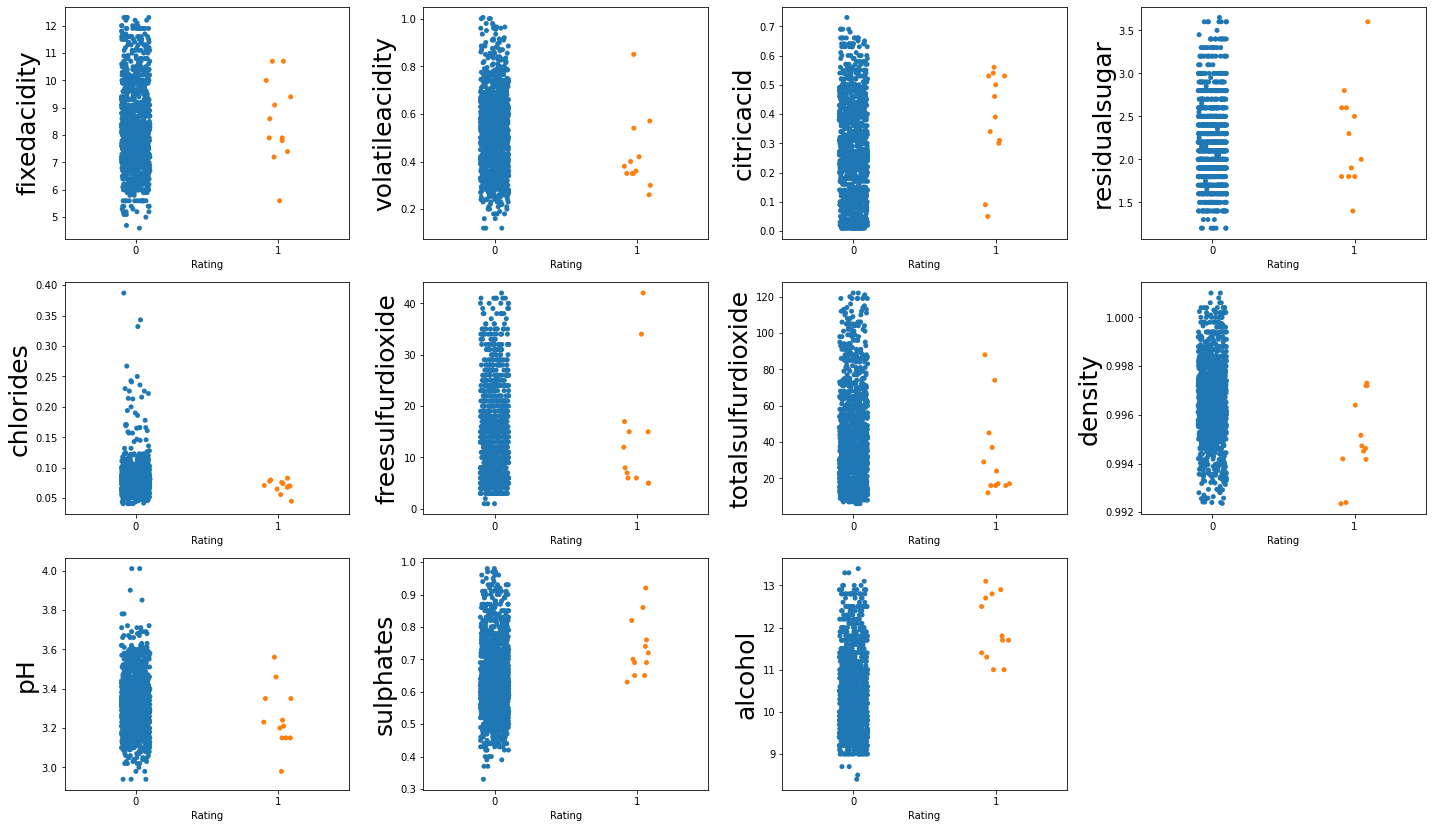

In [58]:
#   see how features are related to class
plt.figure(figsize=(20,15))
plotnumber = 1

for column in X:
    if plotnumber<=11:   # there are 12 column is the given data
        ax = plt.subplot(4,4,plotnumber)
        sns.stripplot(y,X[column])
        plt.ylabel(column,fontsize=25)
        
    plotnumber+=1
plt.tight_layout()

# check multicollinearity problem..find if one features is depend on another features.

In [59]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

# check multicolinearity using VIF(varince inflation factor)

In [60]:
X_scaled.shape

(1263, 11)

In [50]:
# finding variance inflation factor in each scaled column i.e X_scaled.shape[1] (1/(1-r2))

In [61]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif["features"] = X.columns

In [62]:
# let'scheck the value
vif

,vif,features
0,6.880433,fixedacidity
1,1.681871,volatileacidity
2,2.400935,citricacid
3,1.719186,residualsugar
4,1.124074,chlorides
5,1.781027,freesulfurdioxide
6,1.917625,totalsulfurdioxide
7,6.624238,density
8,3.117091,pH
9,1.310513,sulphates


In [63]:
# all vif number is less then 7,so there is no multicolinearity...

In [64]:
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y,test_size = .25, random_state = 355)

In [65]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [70]:
x_test[1]

array([-0.11187825,  1.16237785, -0.31976024,  0.25919621, -0.27687539,
       -0.20179969,  1.51277371,  0.18578787, -0.62122985, -0.81391317,
       -0.88807033])

In [66]:
#lets see how well our model performs on the test data set

In [71]:
y_pred = log_reg.predict(x_test)

In [72]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [73]:
#  model accuracy
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.9873417721518988

In [74]:
#  confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[312,   0],
       [  4,   0]], dtype=int64)

# lets check accuracy manually
accuracy = (TP+TN)/(TP+TN+FP+FN)

In [75]:
(312+0)/(312+0+4+0)

0.9873417721518988

#  similiarly i can manually calculate recall/precison/F1 score

In [76]:
from sklearn.metrics import classification_report

In [77]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       312
           1       0.00      0.00      0.00         4

    accuracy                           0.99       316
   macro avg       0.49      0.50      0.50       316
weighted avg       0.97      0.99      0.98       316



In [78]:
# roc curve

In [79]:
fpr,tpr,thresholds = roc_curve(y_test,y_pred)

In [80]:
# threshold[0] means no instances predicted(it should beread from 0-max)
print('threshold=',thresholds)
print('True positive rate= ',tpr)
print('False positive rate= ',fpr)

threshold= [1 0]
True positive rate=  [0. 1.]
False positive rate=  [0. 1.]


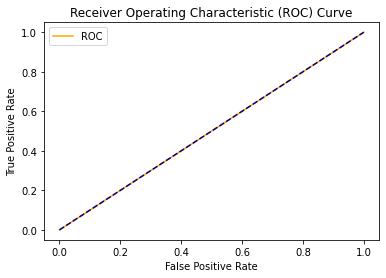

In [86]:
plt.plot(fpr, tpr, color = 'orange',label='ROC')
plt.plot([0,1],[0,1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [88]:
#   how much area it is covering (AUC)
auc_score = roc_auc_score(y_test,y_pred)
print (auc_score)

0.5
